# Clustering : K-means 실습

In [1]:
# 아이리스 데이터
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

iris = load_iris()
irisDF = pd.DataFrame(data = iris.data[:, 2:], columns = ['petal_length', 'petal_width'])
irisDF.head()

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [6]:
# 간단하게 클러스터링
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300,
                n_init = 1, random_state = 77).fit(irisDF)

print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [3]:
# 중심점의 좌표 얻어오기
kmeans.cluster_centers_

array([[4.26923077, 1.34230769],
       [1.462     , 0.246     ],
       [5.59583333, 2.0375    ]])

In [4]:
# 시각화를 위한 데이터 정리
irisDF['species'] = iris.target
x_kc = kmeans.cluster_centers_[:, 0]
y_kc = kmeans.cluster_centers_[:, 1]

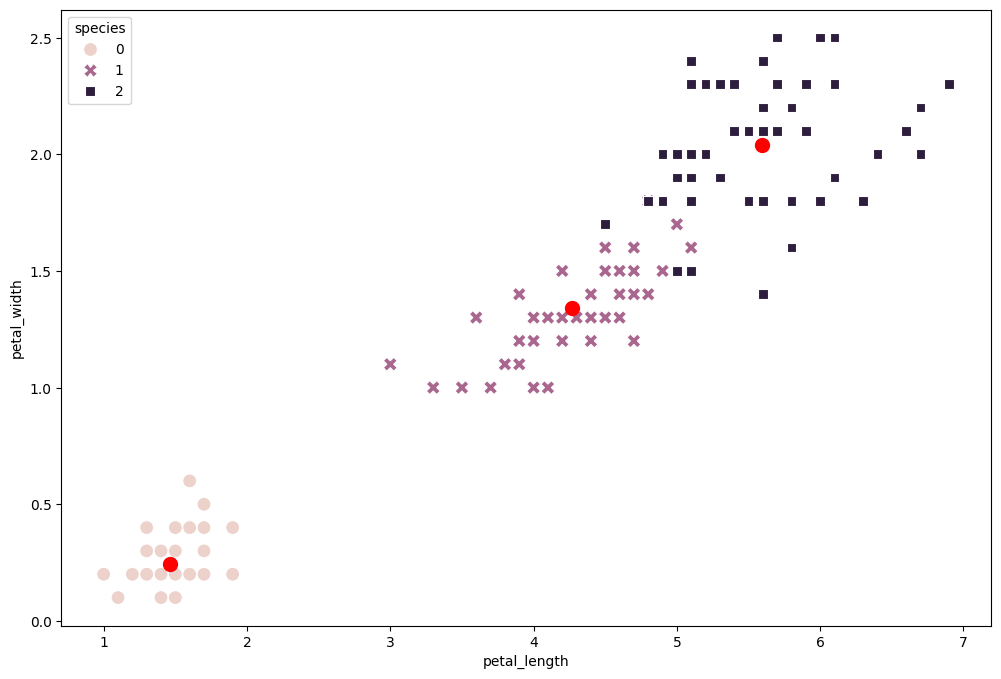

In [5]:
# seaborn을 이용한 시각화
import seaborn as sns

plt.figure(figsize = (12, 8))
sns.scatterplot(x = 'petal_length', y = 'petal_width', hue = 'species',
                style = 'species', s = 100, data = irisDF)
plt.scatter(x_kc, y_kc, s = 100, color = 'r')
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.show()